In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
def plotPairLinear(label, ax, resax, resnormax, x, y):
    ax.plot(x, y, ".", label=label)
    reshaped = x.reshape(-1, 1)
    model = LinearRegression().fit(reshaped, y)
    k = model.coef_[0]
    m = model.intercept_
    modelY = k * x + m
    ax.plot(x, modelY)
    ax.set_title(label + ": k = " + str(k) + " r2 = " + str(model.score(reshaped, y)))
    resax.plot(x, y - modelY, ".")
    resax.set_title("residuals")
    resax.axhline()
    resnormax.hist(x, 50)
    resnormax.set_title("Number of files per size range")

In [4]:
def plotsFor(csvPath):
    mBytes, mChars, mLines, mCode, mTime, mStddev = np.loadtxt(csvPath, delimiter=",", usecols=(0,1,2,3,4,5), skiprows=1, unpack=True)
    fig, ((pBytes, pLines, pCode), (pBytesRes, pLinesRes, pCodeRes), (pBytesResNorm, pLinesResNorm, pCodeResNorm), (pStddev, pStddevHist, unused)) = plt.subplots(4, 3, figsize=(18,15
))
    plotPairLinear("bytes", pBytes, pBytesRes, pBytesResNorm, mBytes, mTime)
    plotPairLinear("lines", pLines, pLinesRes, pLinesResNorm, mLines, mTime)
    plotPairLinear("code", pCode, pCodeRes, pCodeResNorm, mCode, mTime)
    pStddev.plot(mStddev, ".")
    pStddev.set_title("Standard deviations (x-axis meaningless)")
    pStddevHist.hist(mStddev, 100)
    pStddevHist.set_title("Number of files by standard deviation range")
    fig.tight_layout(pad=1)

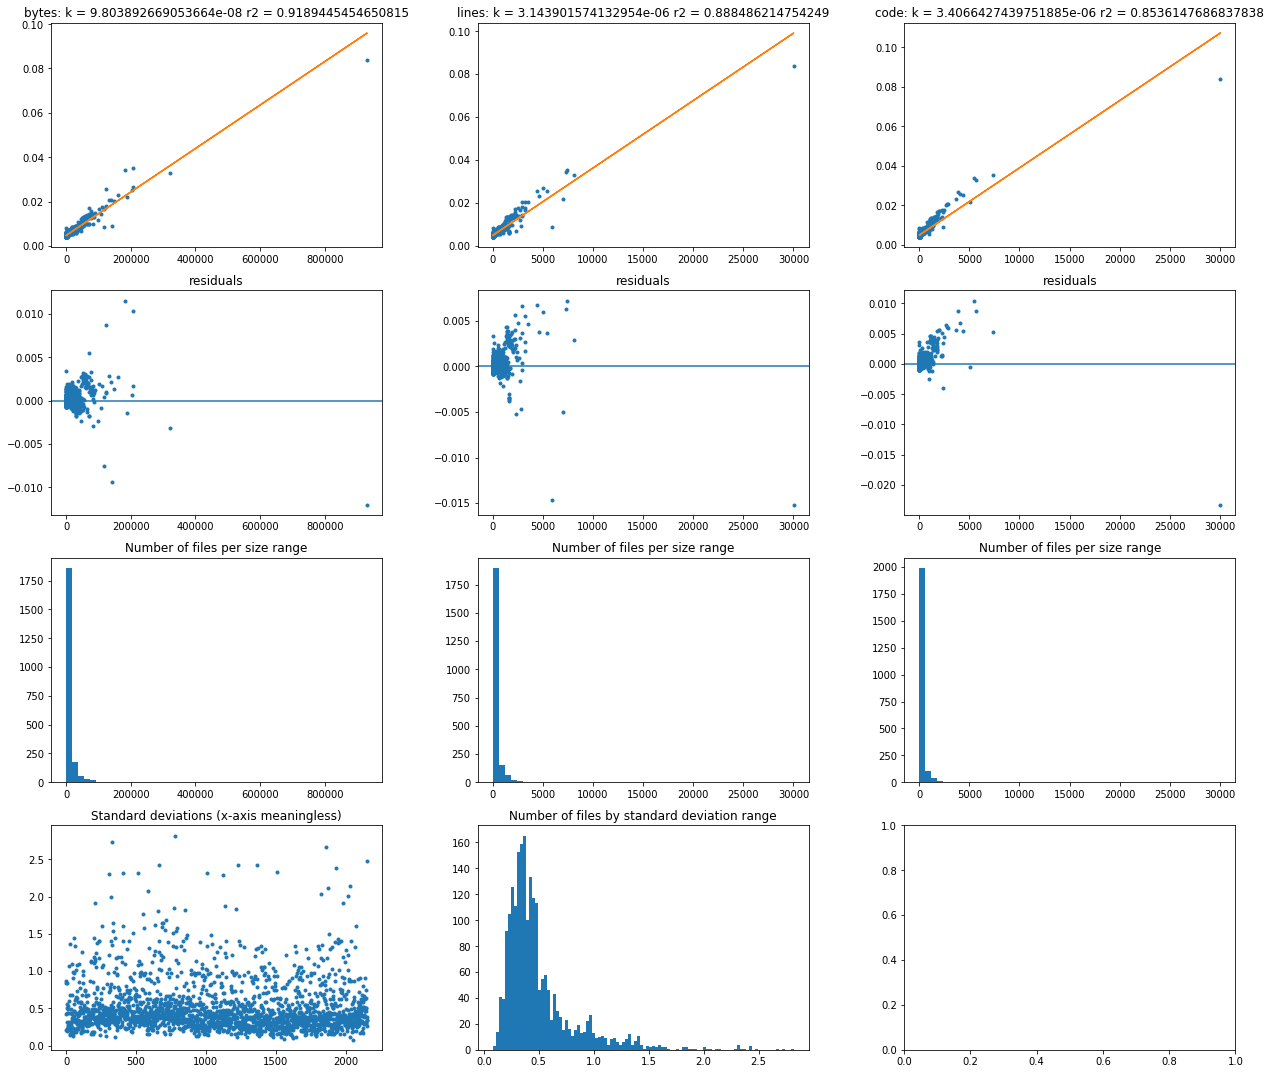

In [5]:
plotsFor("results/ocamlc.csv")

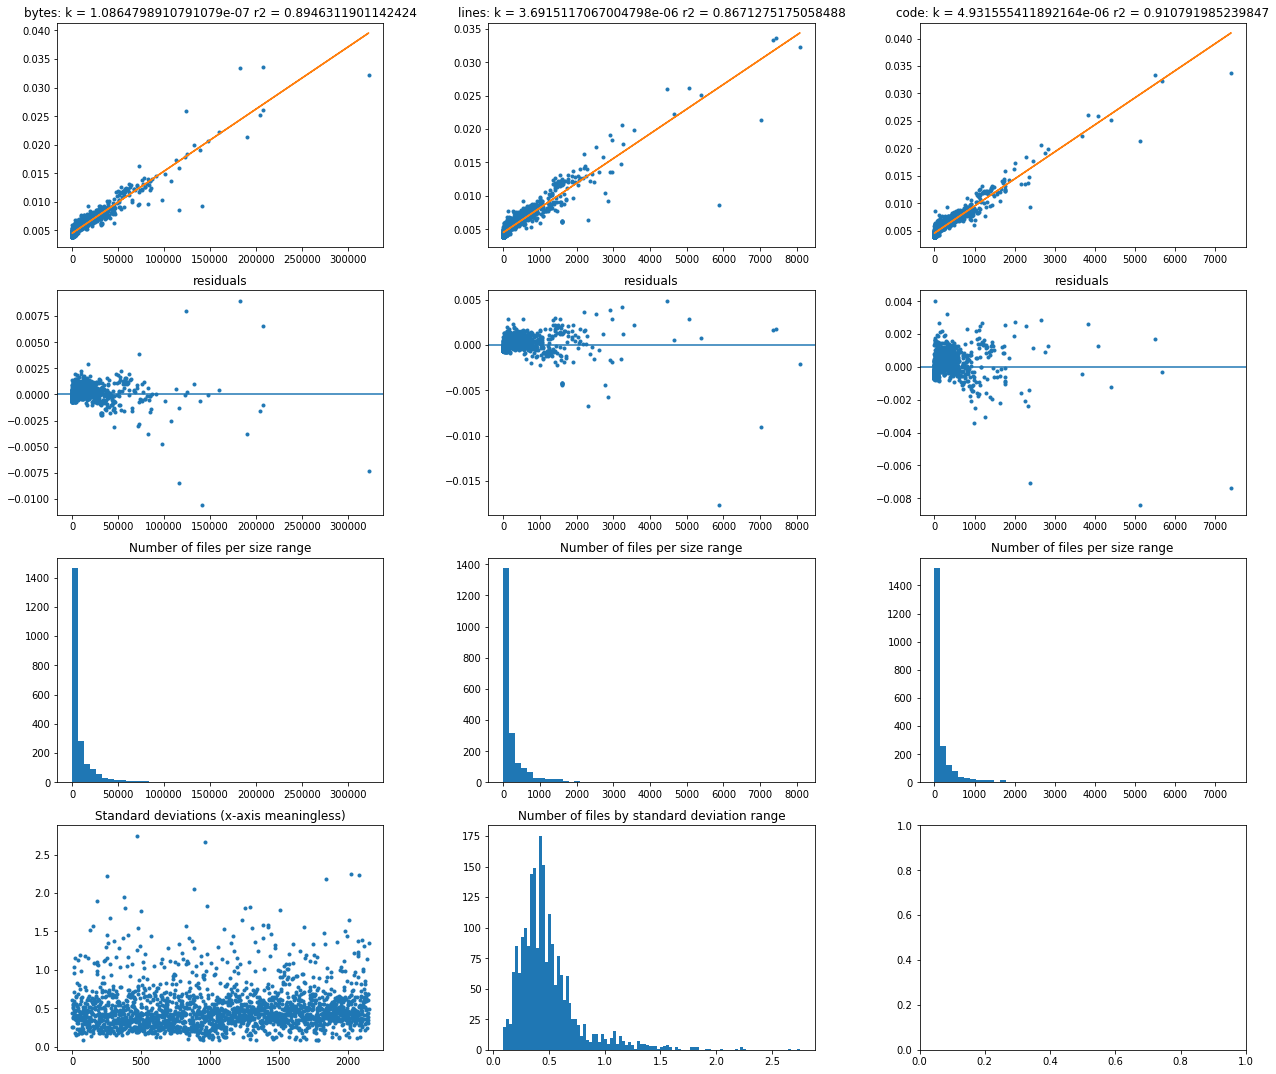

In [6]:
plotsFor("results/ocamlc_outlier_removed.csv")

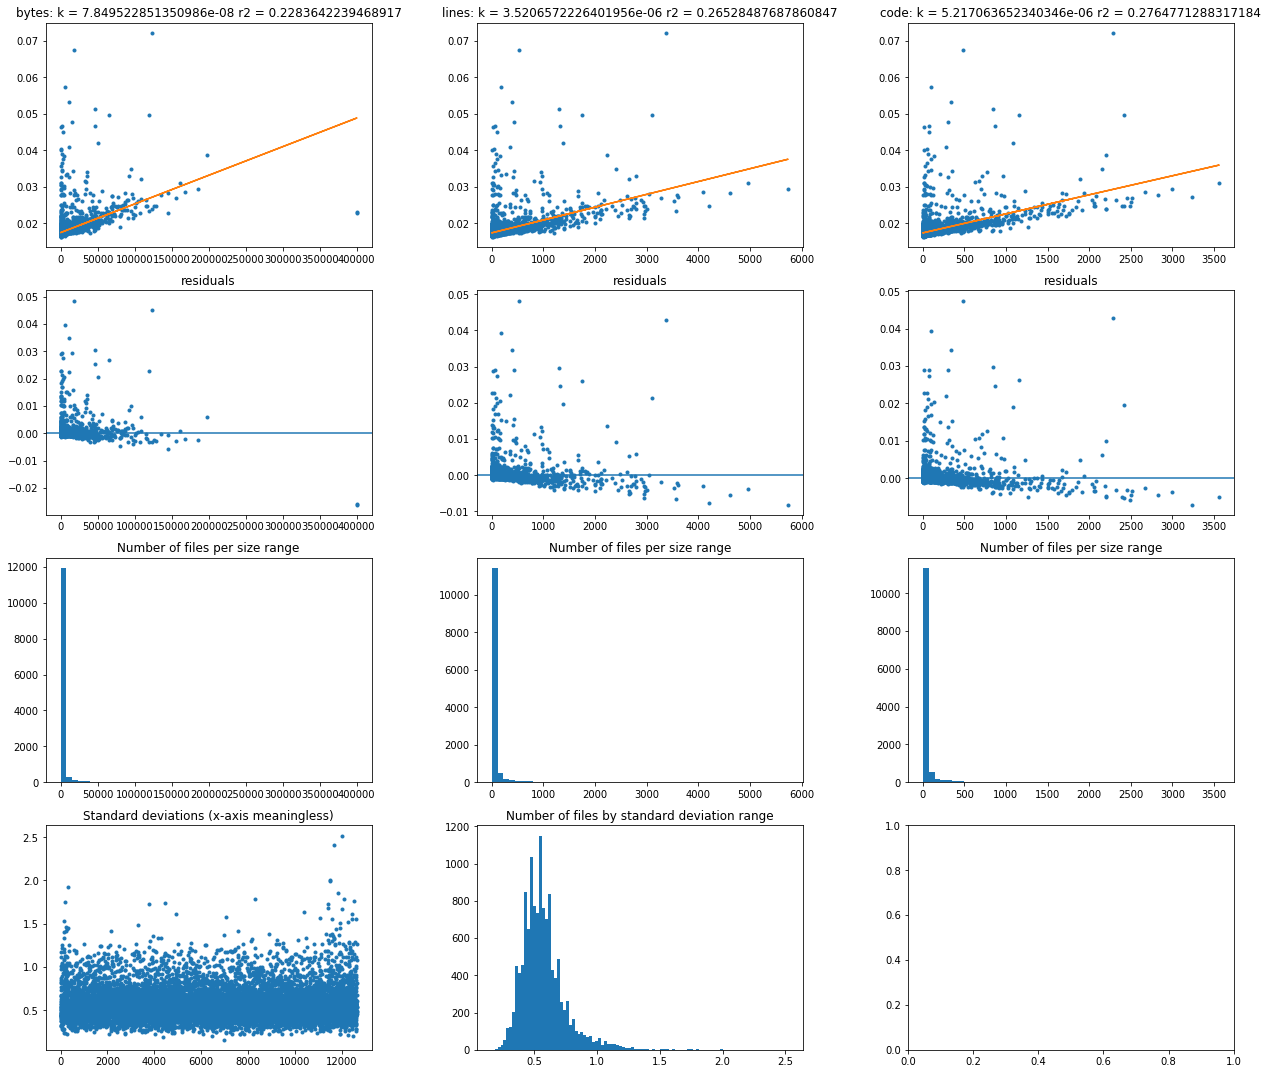

In [7]:
plotsFor("results/rustc.csv")

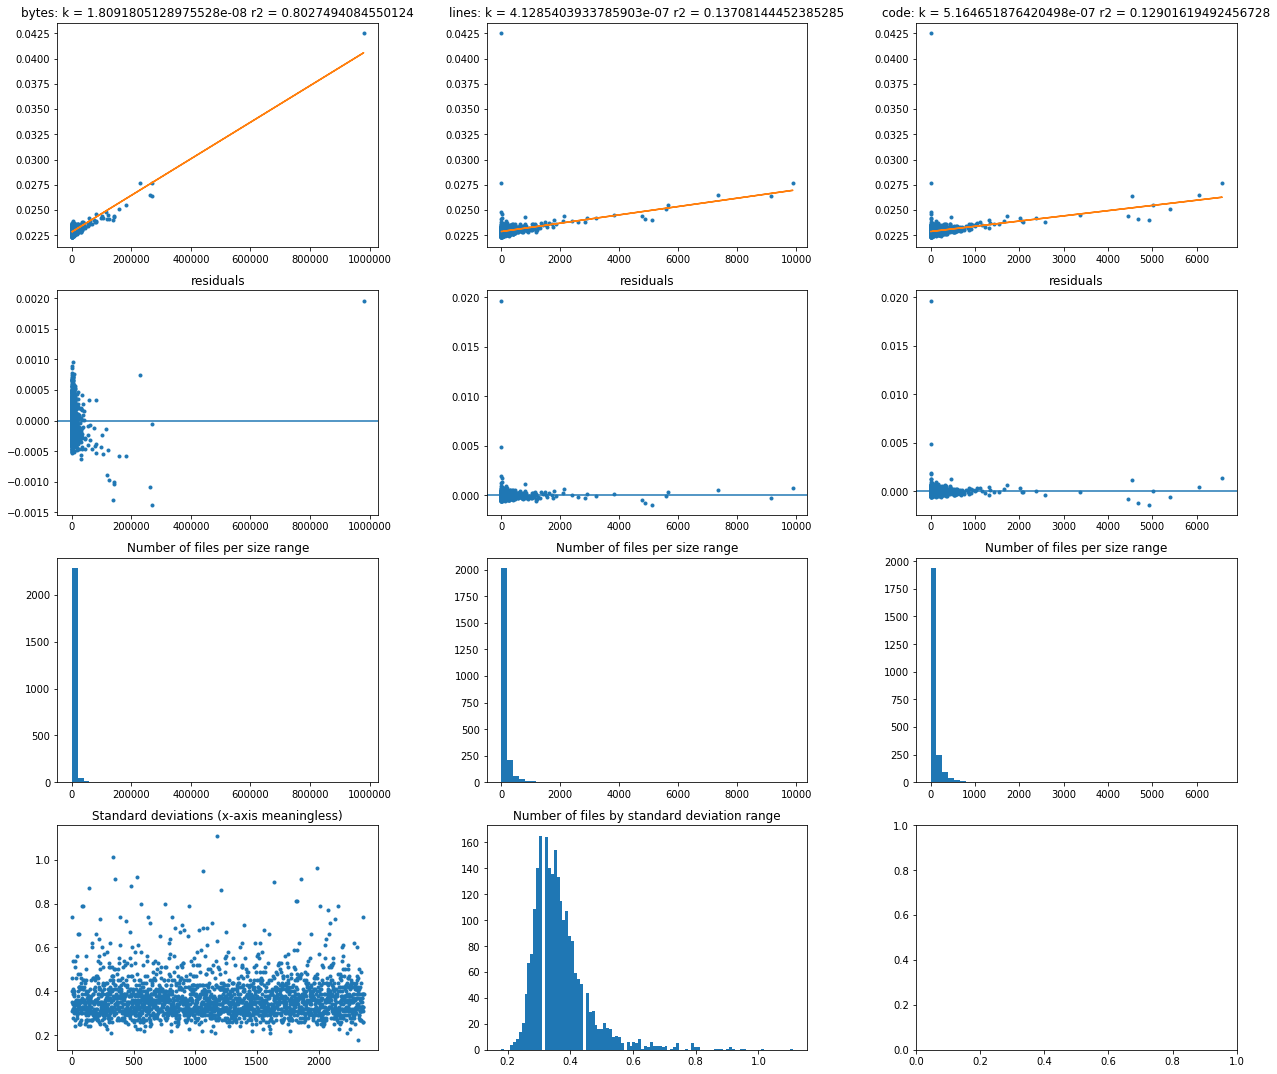

In [8]:
plotsFor("results/node.csv")